Reference: https://www.kaggle.com/crowdflower/twitter-airline-sentiment/kernels

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

 Generate basic statistics for the datasets

In [2]:
df= pd.read_csv("./input/Tweets.csv")
# Column prevview
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Shape
df.shape

(14640, 15)

In [4]:
# Basic statiscal data
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


While the dataset have a high overall confidence, it seems confidence for negative reason is lower.

In [5]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [6]:
pd.Index.intersection(df[df['negativereason'].isnull()].index,df[df['airline_sentiment']=='negative'].index)

Int64Index([], dtype='int64')

No need to clean dataset. Ignoring columns with high null values, except tweet_location: using in later analysis.

In [7]:
# Checking columns
df['tweet_id'].value_counts()

570296616688750592    2
570273819287531520    2
570297548726005761    2
570275970046775297    2
570306867878072320    2
                     ..
569929973156327424    1
569929944291127296    1
567783687980367872    1
569296585697464320    1
570074833993670657    1
Name: tweet_id, Length: 14485, dtype: int64

In [8]:
df['name'].value_counts()

JetBlueNews      63
kbosspotter      32
_mhertz          29
otisday          28
throthra         27
                 ..
MathieuChauve     1
alvintylaw        1
mdf2377           1
scoutout          1
TheMax981         1
Name: name, Length: 7701, dtype: int64

In [9]:
df['user_timezone'].value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Irkutsk                          1
Canberra                         1
Kuala Lumpur                     1
Bucharest                        1
Warsaw                           1
Name: user_timezone, Length: 85, dtype: int64

In [10]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

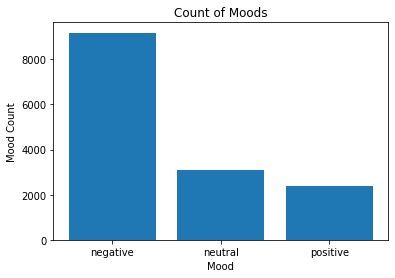

In [11]:
mood_count=df['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,mood_count)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

Most tweets have negative mood, maybe that's because people complain to airline company when they feel the service is bad, but they usually don't praise company on twitter for good service.

Breakdown basic statistics by airlines

In [12]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0.5, 1.0, 'Count of Airline')

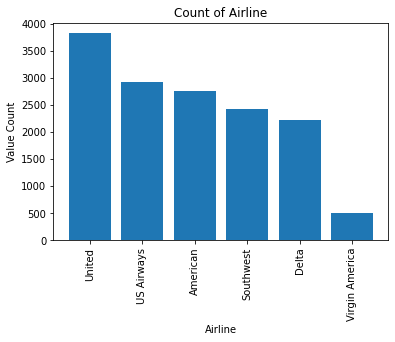

In [13]:
airline_count=df['airline'].value_counts()
Index = [1,2,3,4,5,6]
plt.bar(Index,airline_count)
plt.xticks(Index,['United','US Airways','American', 'Southwest', 'Delta', 'Virgin America'],rotation=90)
plt.ylabel('Value Count')
plt.xlabel('Airline')
plt.title('Count of Airline')

Among all the airlines, united passengers tweet the most, and VA passengers tweet the least.

In [14]:
print('United')
print(df[df['airline']=='United']['airline_sentiment'].value_counts())
print('US Airways')
print(df[df['airline']=='US Airways']['airline_sentiment'].value_counts())
print('American')
print(df[df['airline']=='American']['airline_sentiment'].value_counts())
print('Southwest')
print(df[df['airline']=='Southwest']['airline_sentiment'].value_counts())
print('Delta')
print(df[df['airline']=='Delta']['airline_sentiment'].value_counts())
print('Virgin America')
print(df[df['airline']=='Virgin America']['airline_sentiment'].value_counts())

United
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
US Airways
negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
American
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America
negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


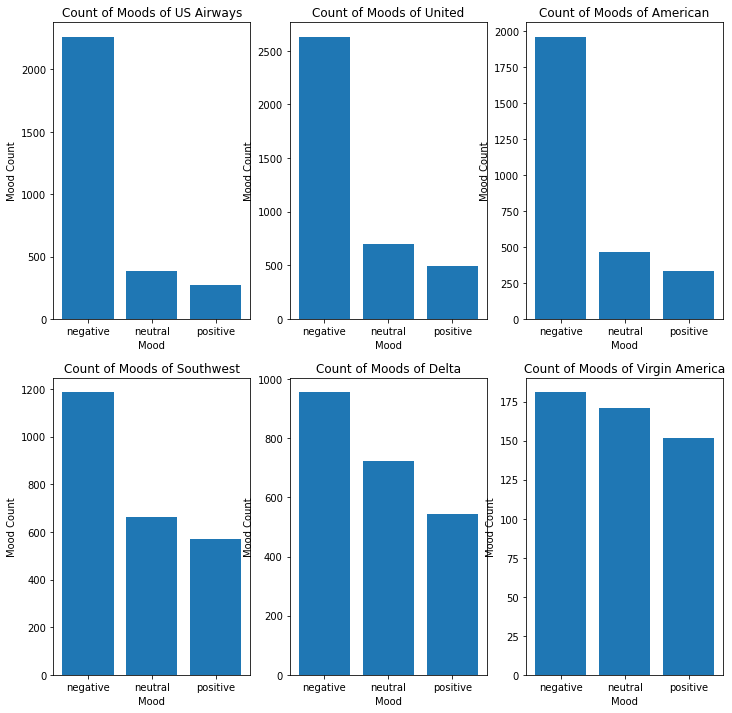

In [15]:
def plot_sub_sentiment(Airline):
    df_pl=df[df['airline']==Airline]
    count=df_pl['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

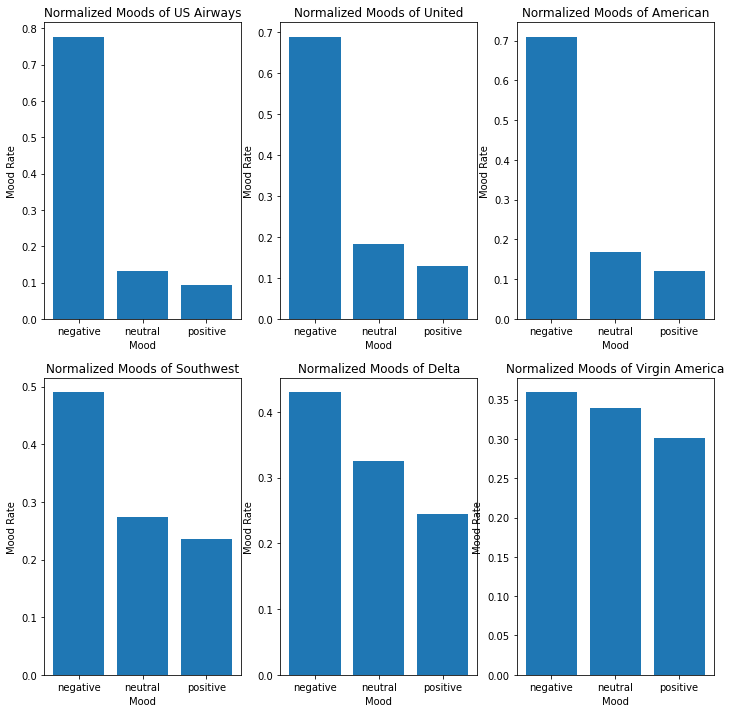

In [16]:
def plot_sub_sentiment(Airline):
    df_pl=df[df['airline']==Airline]
    count=df_pl['airline_sentiment'].value_counts(normalize=True)
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Rate')
    plt.xlabel('Mood')
    plt.title('Normalized Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

While US, Unived and American have a high negative mood rate, Southwest and Delta have a rate below 0.5, and Virgin America have the least negative mood rate. That might indicate better service and fewer complain, which can explain why fewer passengers are tweeting about VA.

In [17]:
print('United')
print(df[df['airline']=='United']['negativereason'].value_counts())
print('US Airways')
print(df[df['airline']=='US Airways']['negativereason'].value_counts())
print('American')
print(df[df['airline']=='American']['negativereason'].value_counts())
print('Southwest')
print(df[df['airline']=='Southwest']['negativereason'].value_counts())
print('Delta')
print(df[df['airline']=='Delta']['negativereason'].value_counts())
print('Virgin America')
print(df[df['airline']=='Virgin America']['negativereason'].value_counts())

United
Customer Service Issue         681
Late Flight                    525
Can't Tell                     379
Lost Luggage                   269
Bad Flight                     216
Cancelled Flight               181
Flight Attendant Complaints    168
Flight Booking Problems        144
longlines                       48
Damaged Luggage                 22
Name: negativereason, dtype: int64
US Airways
Customer Service Issue         811
Late Flight                    453
Can't Tell                     246
Cancelled Flight               189
Lost Luggage                   154
Flight Attendant Complaints    123
Flight Booking Problems        122
Bad Flight                     104
longlines                       50
Damaged Luggage                 11
Name: negativereason, dtype: int64
American
Customer Service Issue         768
Late Flight                    249
Cancelled Flight               246
Can't Tell                     198
Lost Luggage                   149
Flight Booking Problems     

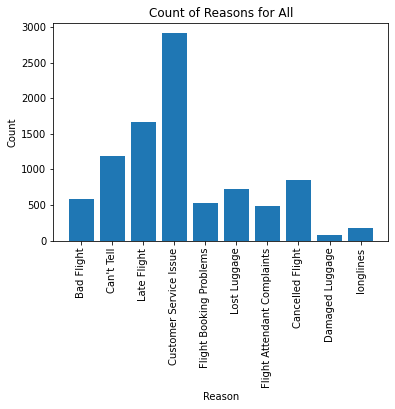

In [18]:
NR_Count=dict(df['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        df_pl=df
    else:
        df_pl=df[df['airline']==Airline]
    count=dict(df_pl['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    df_pl=NR_Count(Airline)
    count=df_pl['count']
    Index = range(1,(len(df_pl)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df_pl['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

plot_reason('All')

Of all negative reasons, customer service issue and late flight are the 2 most common.

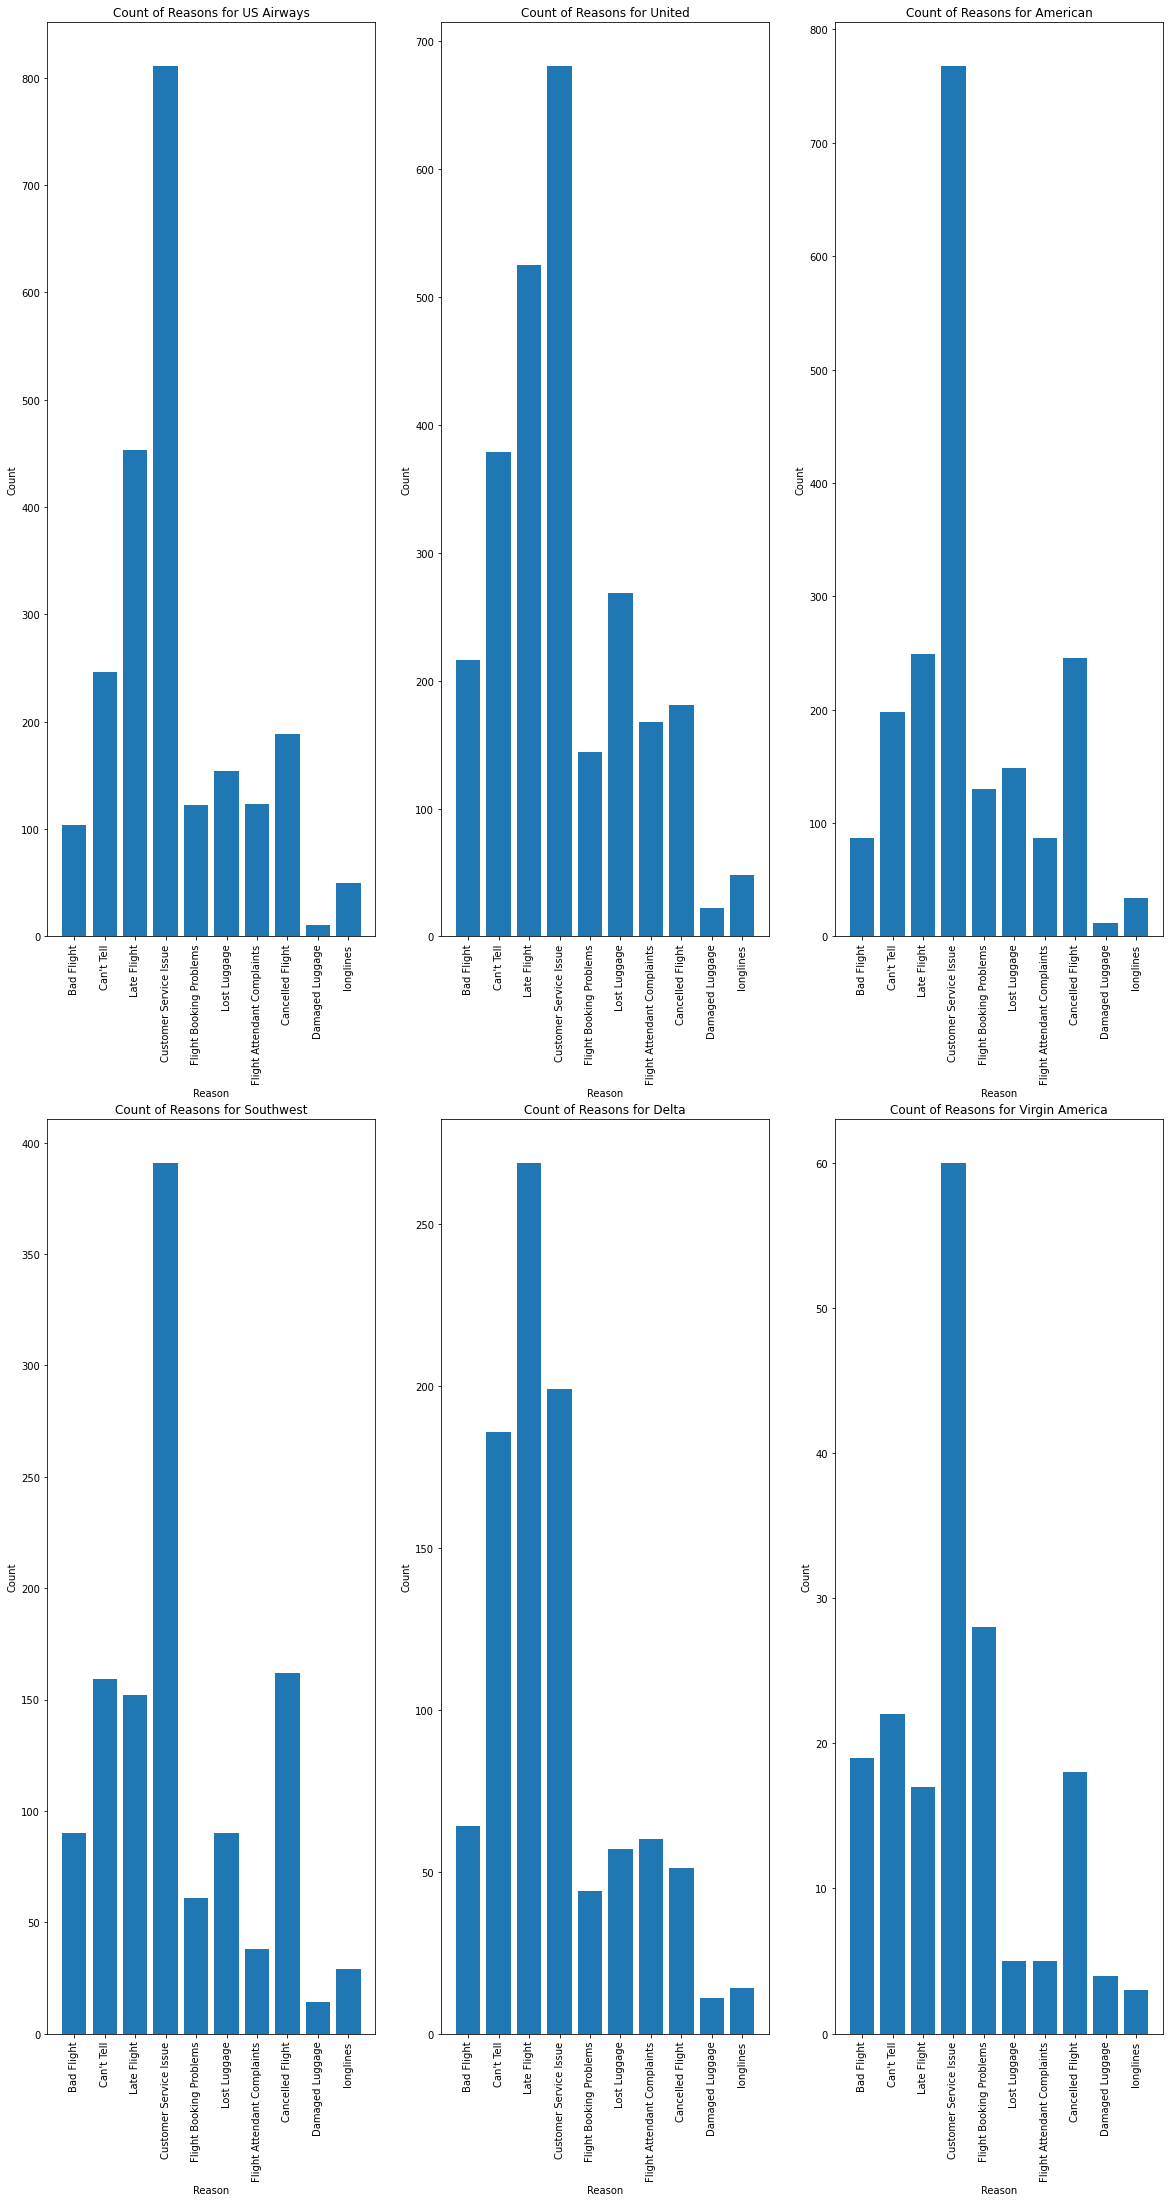

In [46]:
plt.figure(1,figsize=(20, 37))
plt.subplot(231)
plot_reason('US Airways')
plt.subplot(232)
plot_reason('United')
plt.subplot(233)
plot_reason('American')
plt.subplot(234)
plot_reason('Southwest')
plt.subplot(235)
plot_reason('Delta')
plt.subplot(236)
plot_reason('Virgin America')

In [25]:
# Show normalized result
print('United')
print(df[df['airline']=='United']['negativereason'].value_counts(normalize=True))
print('US Airways')
print(df[df['airline']=='US Airways']['negativereason'].value_counts(normalize=True))
print('American')
print(df[df['airline']=='American']['negativereason'].value_counts(normalize=True))
print('Southwest')
print(df[df['airline']=='Southwest']['negativereason'].value_counts(normalize=True))
print('Delta')
print(df[df['airline']=='Delta']['negativereason'].value_counts(normalize=True))
print('Virgin America')
print(df[df['airline']=='Virgin America']['negativereason'].value_counts(normalize=True))

United
Customer Service Issue         0.258640
Late Flight                    0.199392
Can't Tell                     0.143942
Lost Luggage                   0.102165
Bad Flight                     0.082036
Cancelled Flight               0.068743
Flight Attendant Complaints    0.063806
Flight Booking Problems        0.054690
longlines                      0.018230
Damaged Luggage                0.008355
Name: negativereason, dtype: float64
US Airways
Customer Service Issue         0.358374
Late Flight                    0.200177
Can't Tell                     0.108705
Cancelled Flight               0.083517
Lost Luggage                   0.068051
Flight Attendant Complaints    0.054353
Flight Booking Problems        0.053911
Bad Flight                     0.045957
longlines                      0.022095
Damaged Luggage                0.004861
Name: negativereason, dtype: float64
American
Customer Service Issue         0.391837
Late Flight                    0.127041
Cancelled Flight   

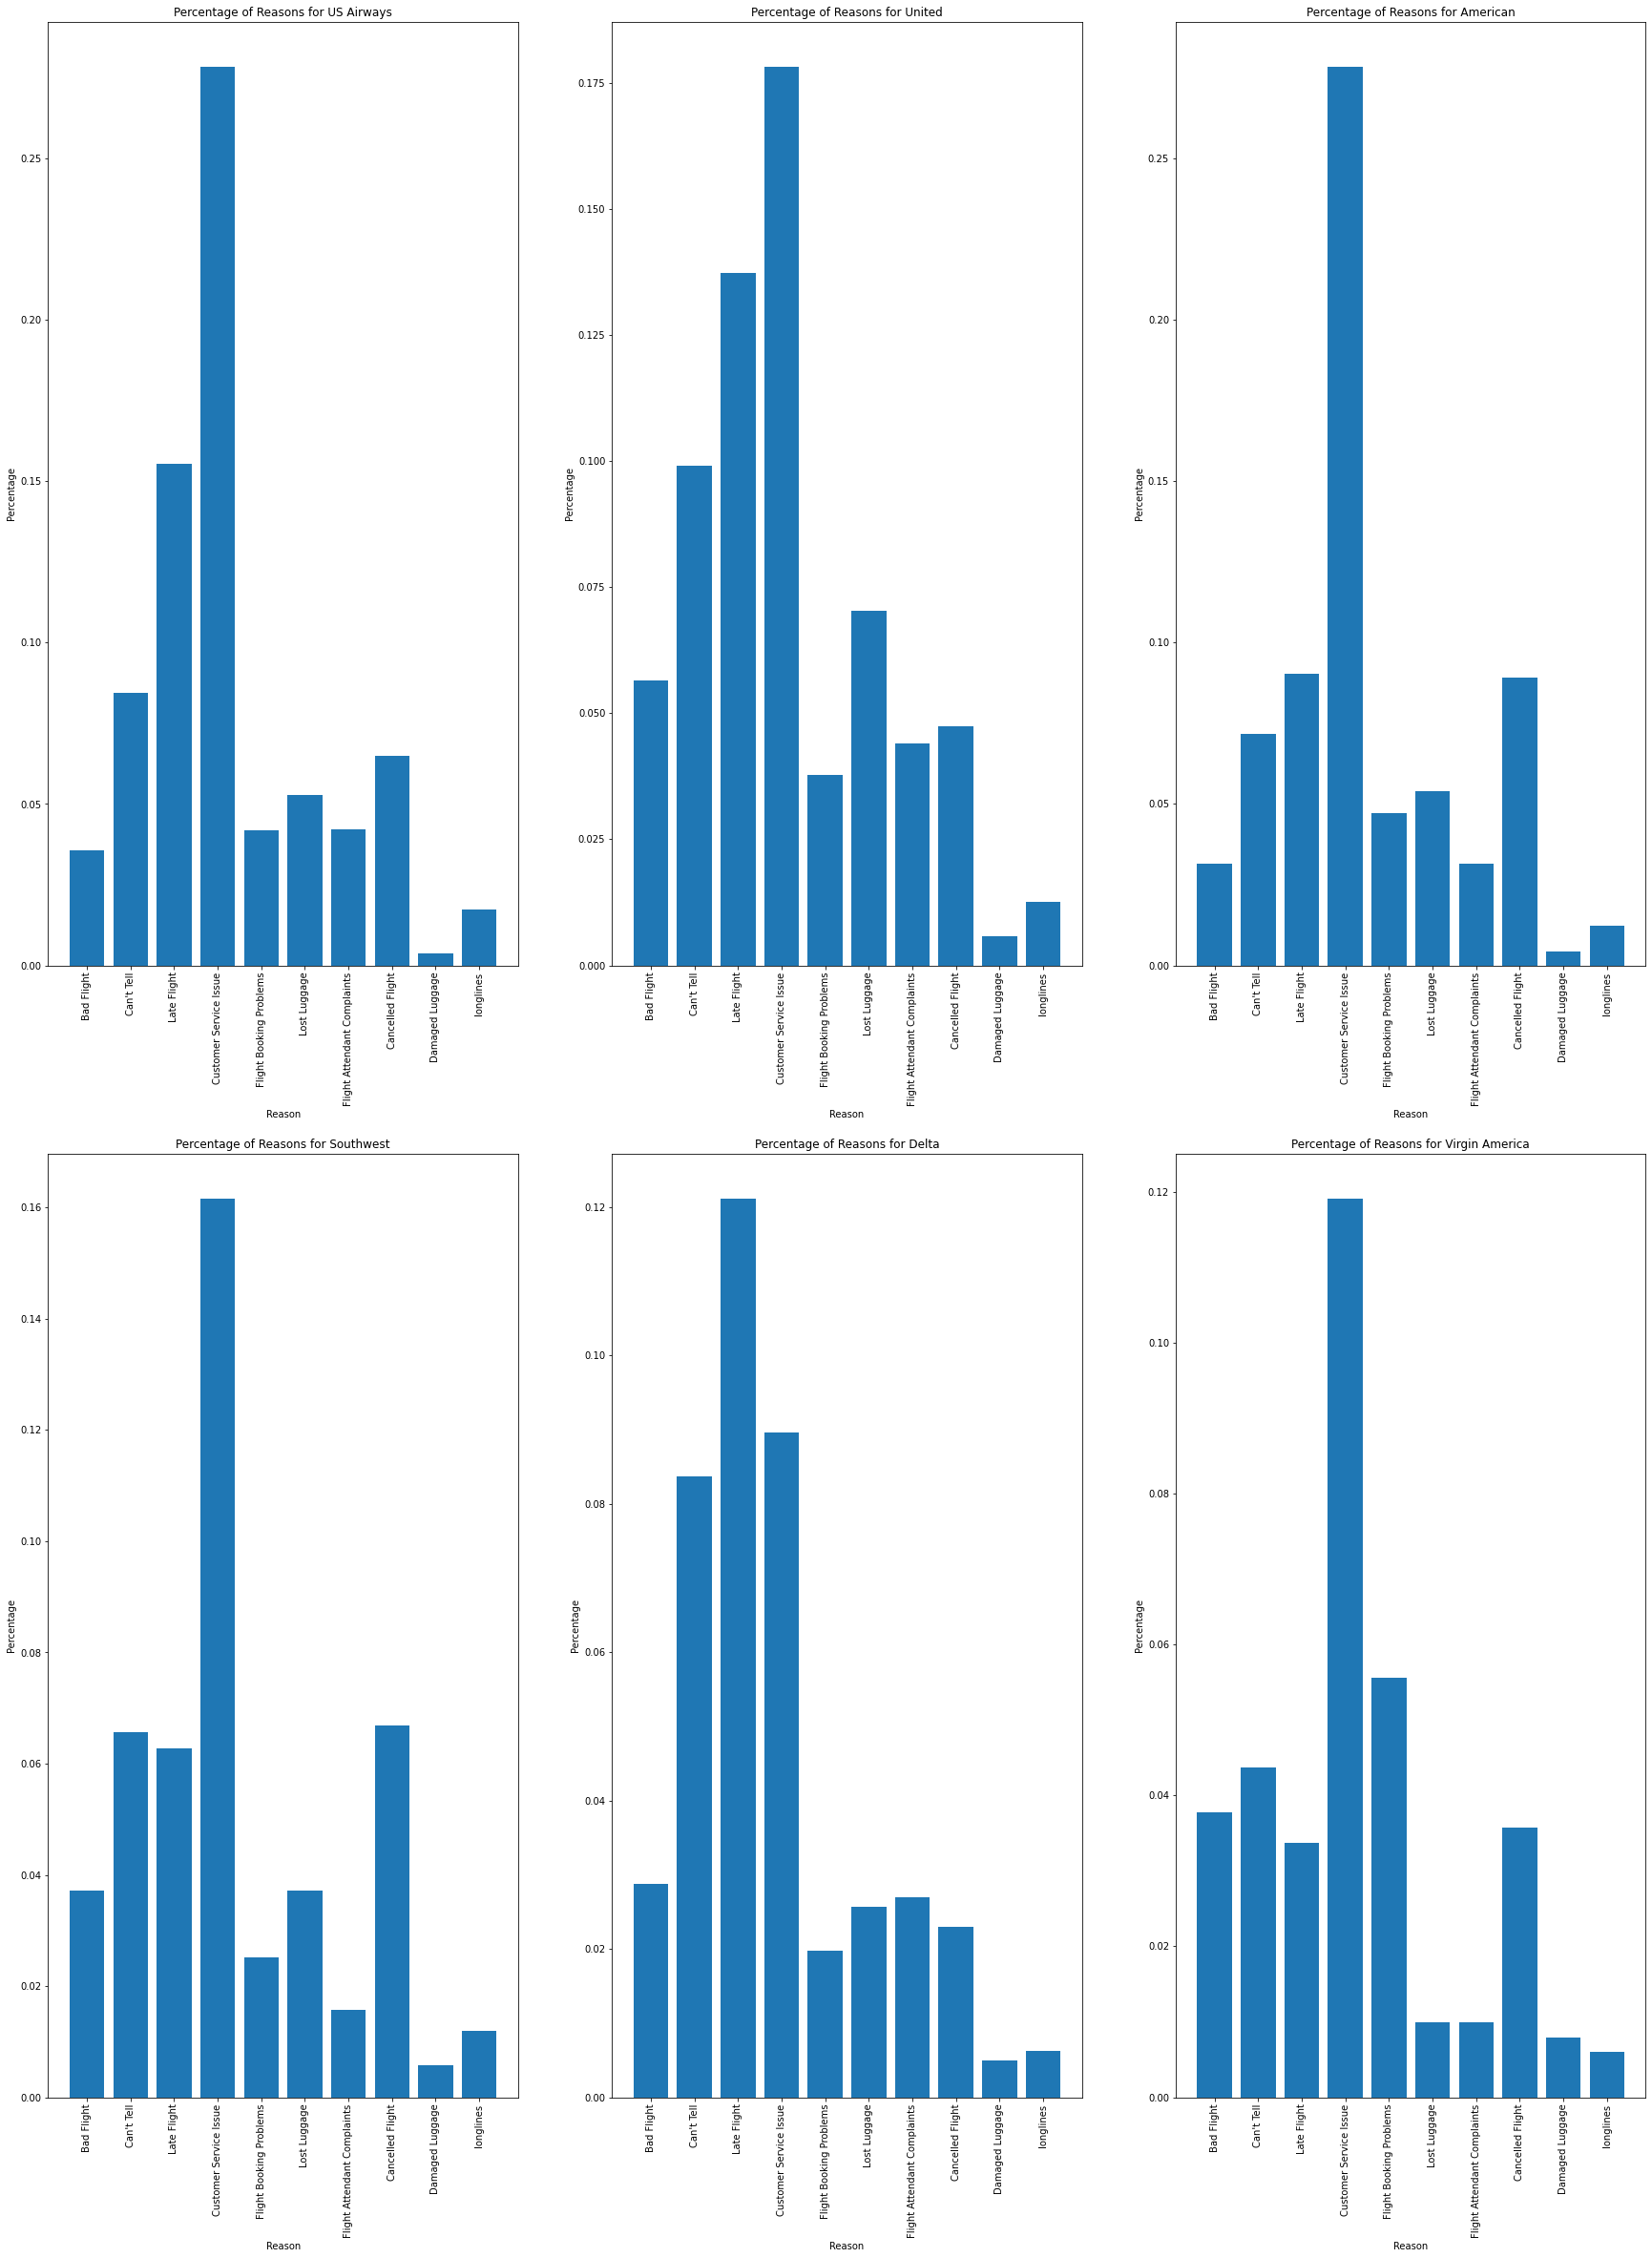

In [26]:
NR_Count=dict(df['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        df_pl=df
    else:
        df_pl=df[df['airline']==Airline]
    count=dict(df_pl['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_rate(Airline):
    df_pl=NR_Count(Airline)
    count=df_pl['count']/len(df[df['airline']==Airline])
    Index = range(1,(len(df_pl)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df_pl['Reasons'],rotation=90)
    plt.ylabel('Percentage')
    plt.xlabel('Reason')
    plt.title('Percentage of Reasons for '+Airline)


plt.figure(1,figsize=(30, 40))
plt.subplot(231)
plot_rate('US Airways')
plt.subplot(232)
plot_rate('United')
plt.subplot(233)
plot_rate('American')
plt.subplot(234)
plot_rate('Southwest')
plt.subplot(235)
plot_rate('Delta')
plt.subplot(236)
plot_rate('Virgin America')

Top 3 reasons for each airline:

US Airline: customer service issue, late flight, cancelled flight

United: customer service issue, late flight, lost luggage

American: customer service issue, late flight, cancelled flight

Southwest: customer service issue, cancelled flight, late flight

Delta: late flight, customer service issue, bad flight

Virgin America: customer service issue, flight booking problems, bad flight

In [20]:
df[df['airline_sentiment']=='negative']['airline'].value_counts()

United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: airline, dtype: int64

In [21]:
# How each airline contribute to negative tweets

df[df['airline_sentiment']=='negative']['airline'].value_counts(normalize=True)

United            0.286882
US Airways        0.246568
American          0.213554
Southwest         0.129222
Delta             0.104053
Virgin America    0.019721
Name: airline, dtype: float64

Text(0.5, 1.0, 'Negative Percentage')

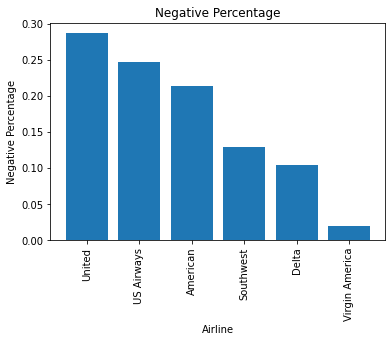

In [47]:
negative_rate=df[df['airline_sentiment']=='negative']['airline'].value_counts(normalize=True)
Index = [1,2,3,4,5,6]
plt.bar(Index,negative_rate)
plt.xticks(Index,['United','US Airways','American', 'Southwest', 'Delta', 'Virgin America'],rotation=90)
plt.ylabel('Negative Percentage')
plt.xlabel('Airline')
plt.title('Negative Percentage')

In [23]:
# percentage of negative tweets for each airline
df[df['airline_sentiment']=='negative']['airline'].value_counts()/df['airline'].value_counts()


United            0.688906
US Airways        0.776862
American          0.710402
Southwest         0.490083
Delta             0.429793
Virgin America    0.359127
Name: airline, dtype: float64

Text(0.5, 1.0, 'Negative Rate')

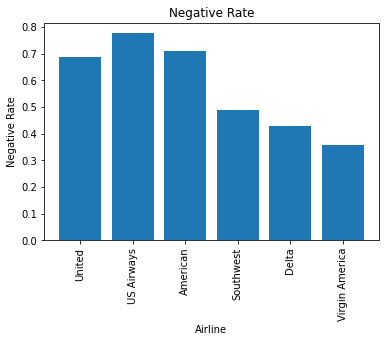

In [24]:
negative_rate=df[df['airline_sentiment']=='negative']['airline'].value_counts()/df['airline'].value_counts()
Index = [1,2,3,4,5,6]
plt.bar(Index,negative_rate)
plt.xticks(Index,['United','US Airways','American', 'Southwest', 'Delta', 'Virgin America'],rotation=90)
plt.ylabel('Negative Rate')
plt.xlabel('Airline')
plt.title('Negative Rate')

Does time affect tweet’s sentiment ratings for airlines?

In [27]:
date = df.reset_index()
date.tweet_created = pd.to_datetime(date.tweet_created)
date.tweet_created = date.tweet_created.dt.date
date.tweet_created
day_df = date.groupby(['tweet_created','airline','airline_sentiment']).size()
# # day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

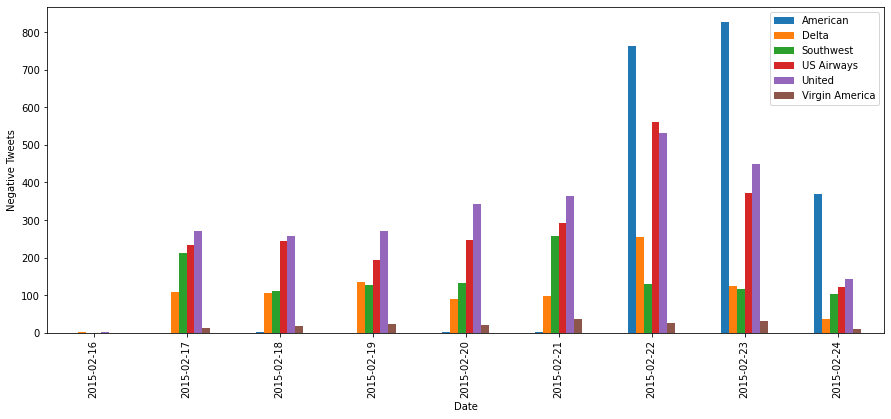

In [28]:
day_df = day_df.loc(axis=0)[:,:,'negative']

ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar',  figsize = (15,6), rot = 90)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

Data of American are concentrated in 02-22~02-24. But American doesn't contribute most to negative tweets. That might indicate a potentially higher negative percentage contribution of American.

Basically, number of negative tweets are American, United>US Airways>Southwest>Delta>Virgin America, but on 02-22 US Airways has more negative tweets than United.

Does location affect tweet’s sentiment ratings for airlines?

In [29]:
df['tweet_location'].value_counts()

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
                                 ... 
Lea Michele                         1
Northridge, CA                      1
Kansas City/Milwaukee               1
Tempe, Arizona                      1
Swooning in New York, New York      1
Name: tweet_location, Length: 3081, dtype: int64

In [30]:
# (df['tweet_location'].value_counts().loc[lambda x : x>10]).to_csv(r'loc.csv', index = True)

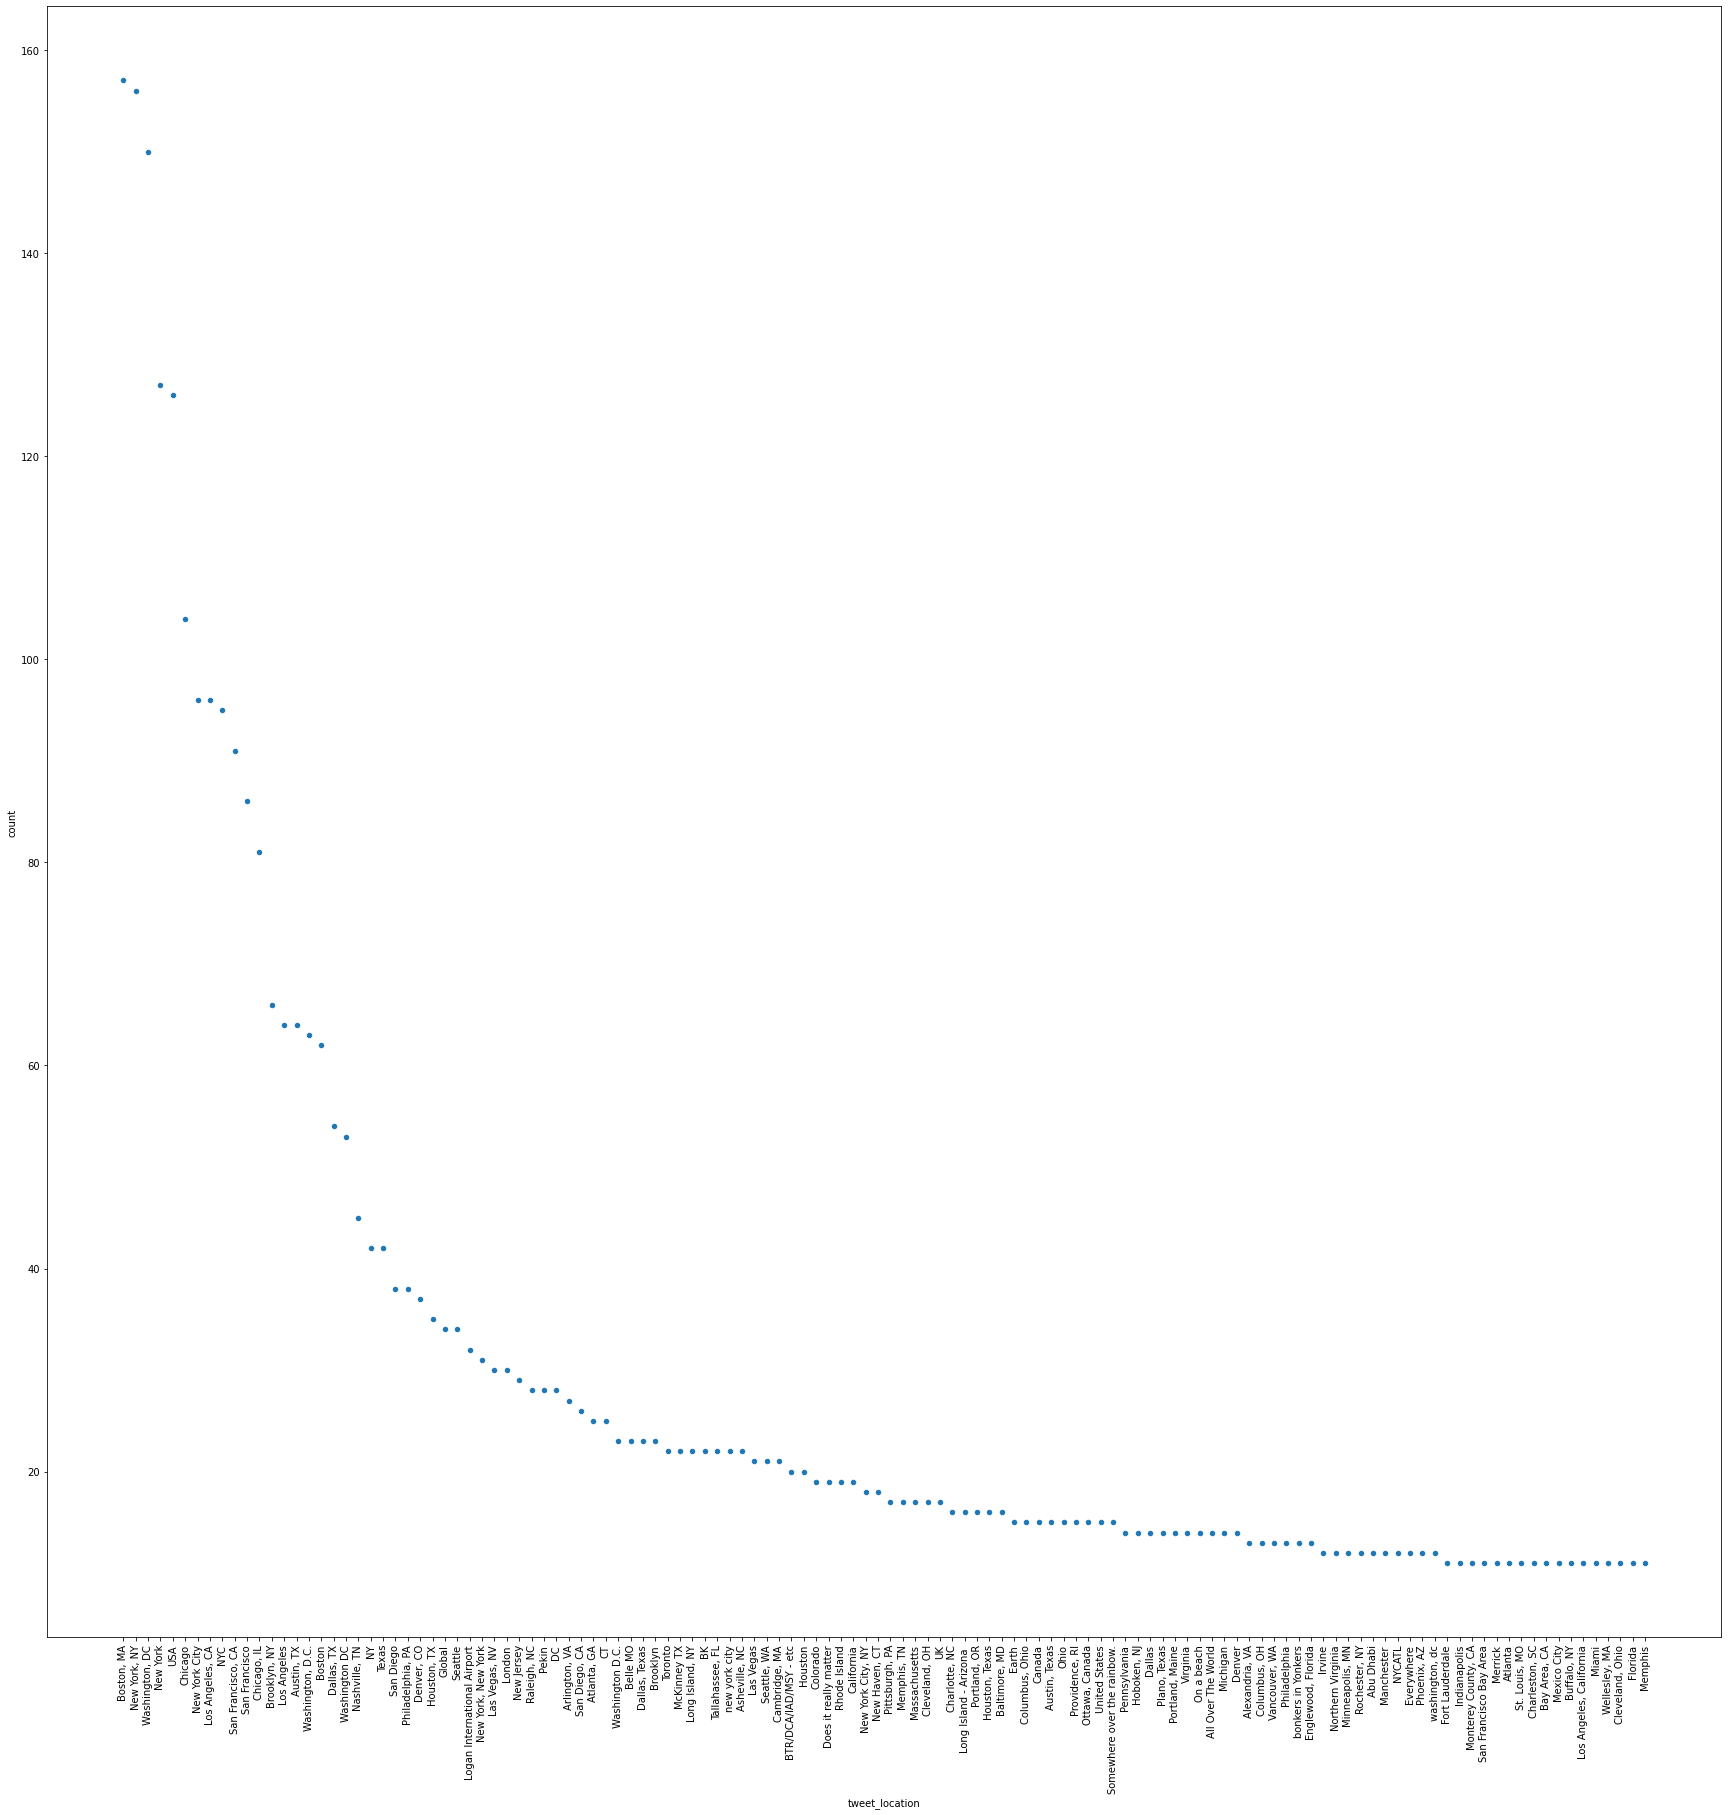

In [36]:
tweet_location  = pd.read_csv(r'loc.csv')
tweet_location.plot(kind='scatter',x='tweet_location',y='count',figsize = (30,30)) # scatter plot
plt.xticks(rotation=90)

plt.show()

In [32]:
df['tweet_location'].value_counts().loc[lambda x : x>20] 

Boston, MA                     157
New York, NY                   156
Washington, DC                 150
New York                       127
USA                            126
Chicago                        104
New York City                   96
Los Angeles, CA                 96
NYC                             95
San Francisco, CA               91
San Francisco                   86
Chicago, IL                     81
Brooklyn, NY                    66
Los Angeles                     64
Austin, TX                      64
Washington, D.C.                63
Boston                          62
Dallas, TX                      54
Washington DC                   53
Nashville, TN                   45
NY                              42
Texas                           42
San Diego                       38
Philadelphia, PA                38
Denver, CO                      37
Houston, TX                     35
Global                          34
Seattle                         34
Logan International 

Location data is scattered. There are more than 3000 locations but only about 50 with more than 20 counts. That gives location data lower analysis potential.

In [33]:
place_filtered = df[df['tweet_location'].isin(df['tweet_location'].value_counts()[df['tweet_location'].value_counts()>=20].index)]
place_filtered.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York
12,570289584061480960,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica This is such a great deal! Alre...,NaN,2015-02-24 10:30:06 -0800,NYC,America/New_York


In [34]:
place = place_filtered.reset_index()
# place.tweet_created = pd.to_placetime(place.tweet_created)
# place.tweet_created = place.tweet_created.dt.place
# place.tweet_created
place_df = place.groupby(['tweet_location','airline','airline_sentiment']).size()
# # place_df = place_df.reset_index()
place_df

tweet_location  airline         airline_sentiment
Arlington, VA   American        negative              7
                Delta           negative              3
                Southwest       neutral               1
                US Airways      negative              8
                                neutral               1
                                                     ..
Washington, DC  Virgin America  neutral               1
                                positive              2
new york city   American        negative             18
                Delta           negative              1
                                positive              3
Length: 564, dtype: int64

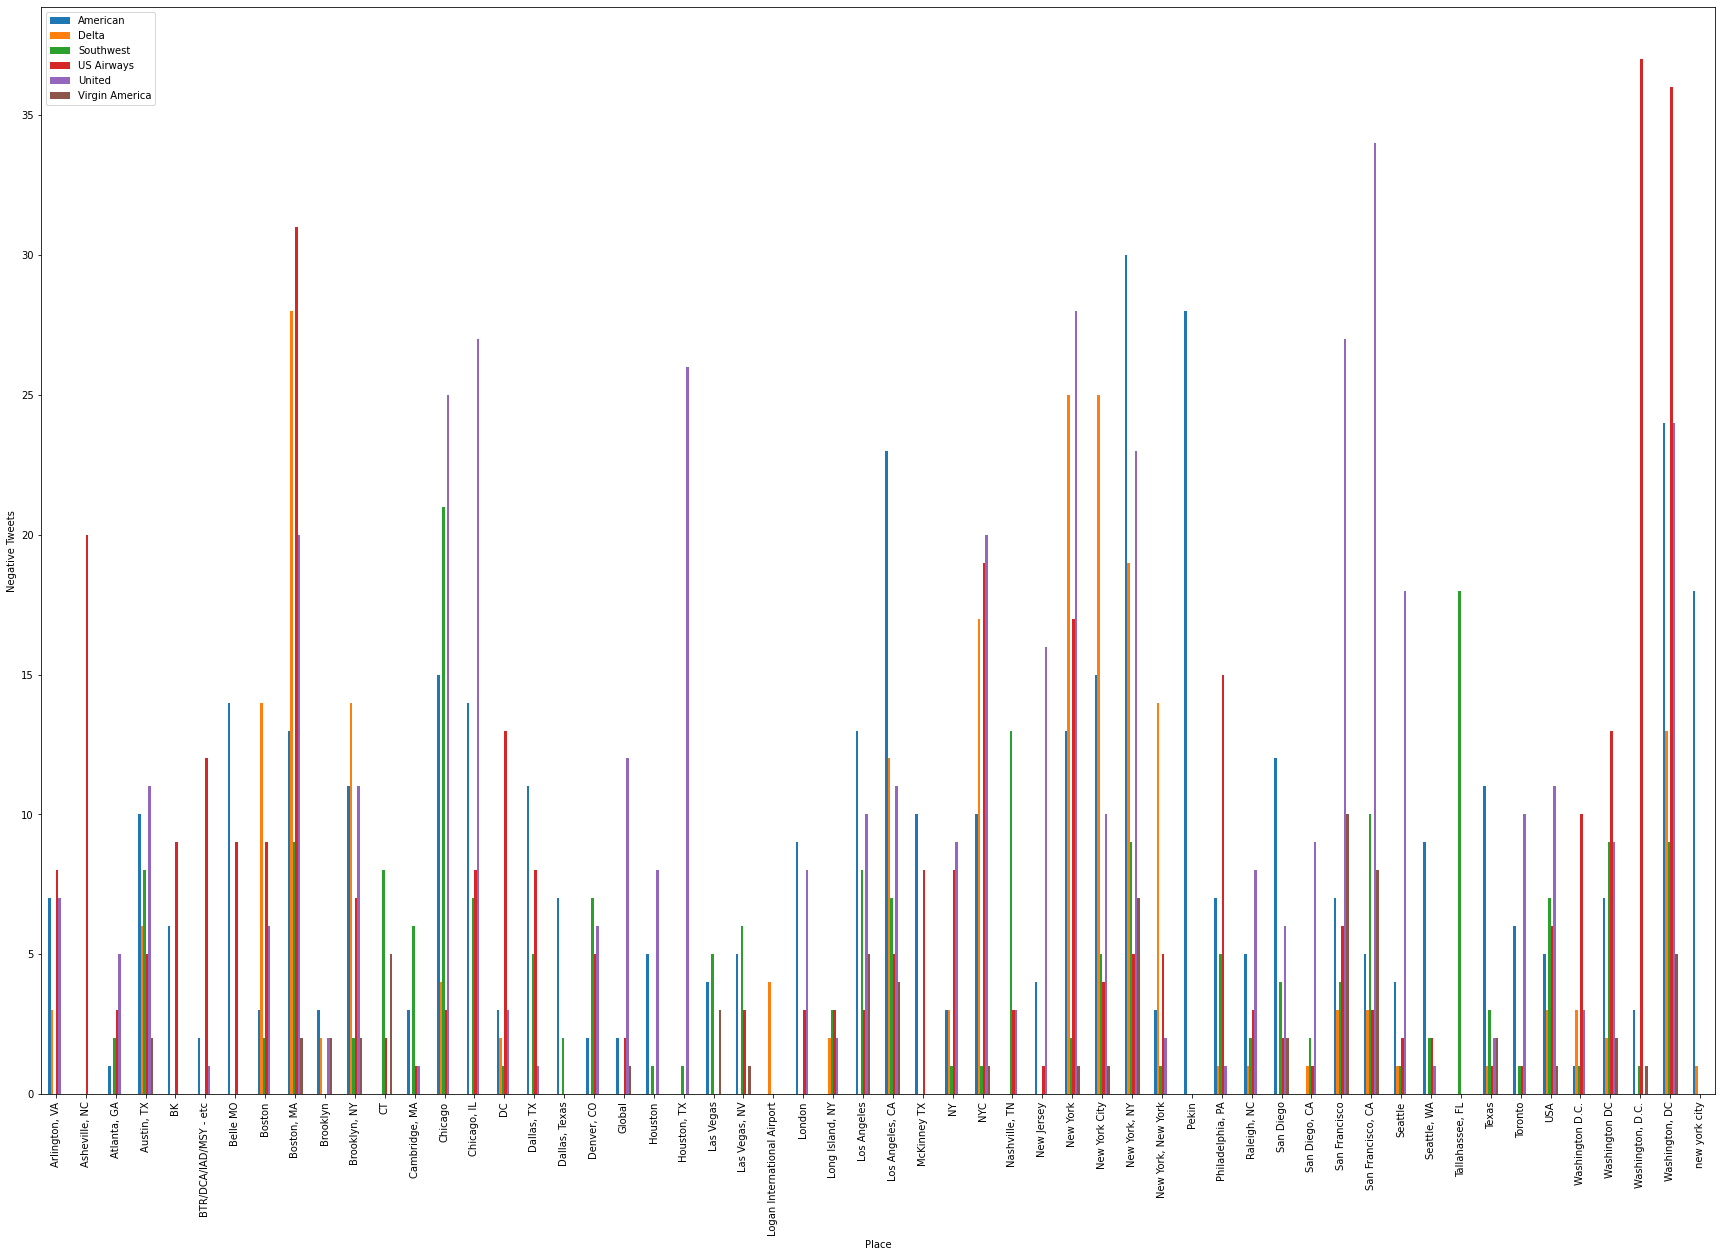

In [35]:
place_df = place_df.loc(axis=0)[:,:,'negative']

ax2 = place_df.groupby(['tweet_location','airline']).sum().unstack().plot(kind = 'bar',  figsize = (30,20), rot = 90)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Place')
ax2.set_ylabel('Negative Tweets')
plt.show()

Data is too scattered for time-place correlation analysis.